tanto per cambiare pure qui non quadra UCL del T2 chart (qui n=1, la formula col beta)

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

In [2]:

# Define the data
data_table_2 = {
    'X1': [3.94, 4.51, 5.14, 4.69, 5.32, 5.42, 4.02, 4.81, 2.76, 6.20, 
           4.34, 3.74, 4.73, 3.50, 4.98, 4.41, 7.28, 6.19, 7.02, 5.46],
    'X2': [177.68, 614.00, 1380.22, 1422.26, 1176.15, 4536.90, 354.25, 
           1176.15, 275.89, 3102.61, 1164.45, 487.85, 518.01, 93.69, 
           3827.63, 450.34, 7631.20, 4272.69, 138.38, 862.64]
}

# Create the DataFrame
data = pd.DataFrame(data_table_2)

# Display the DataFrame
data.head()

,X1,X2
0,3.94,177.68
1,4.51,614.00
2,5.14,1380.22
3,4.69,1422.26
4,5.32,1176.15


Number of points n = 20
Mean = 4.92


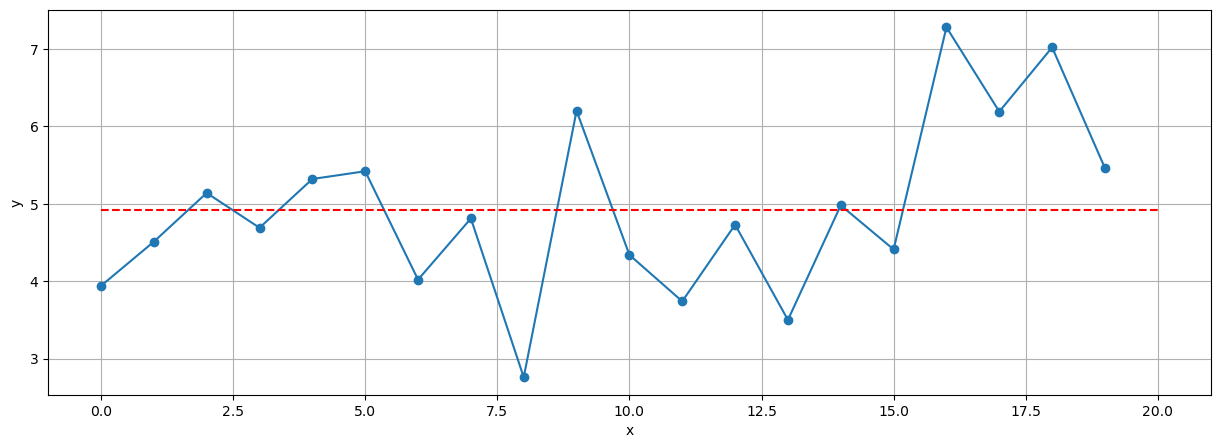

Number of points n = 20
Mean = 1683.15


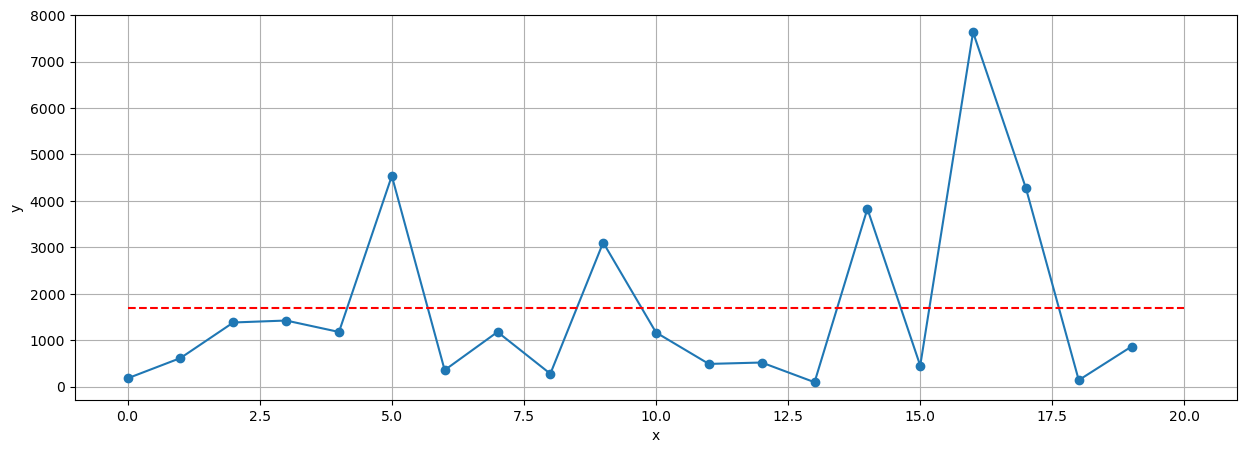

In [3]:
mf.single_ts_plot(data['X1'])
mf.single_ts_plot(data['X2'])

In [4]:
mf.runs(data['X1'])
mf.runs(data['X2'])

Runs test statistic = -0.418
Runs test p-value = 0.676
Accept H0: the data are random
Runs test statistic = 0.312
Runs test p-value = 0.755
Accept H0: the data are random


p-value of the Shapiro-Wilk test: 0.860


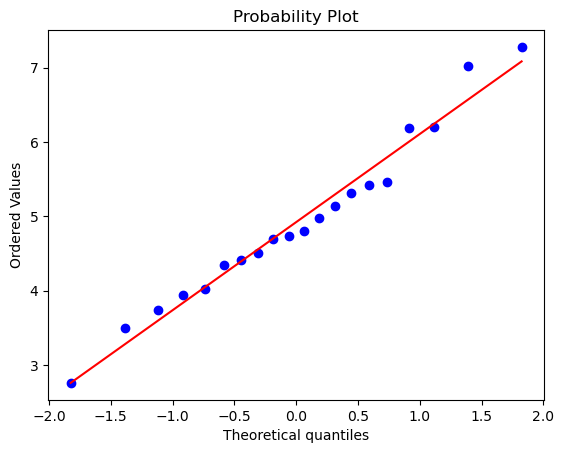

Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.000


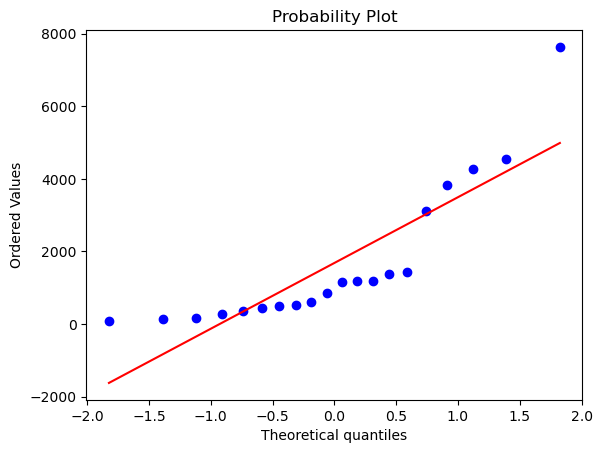

Reject H0: the data are not normal


In [5]:
mf.shapiroqq(data['X1'])
mf.shapiroqq(data['X2'])

è evidente che X2 non sia normale! Bisogna andare di Boxcox per fare univariate CC!

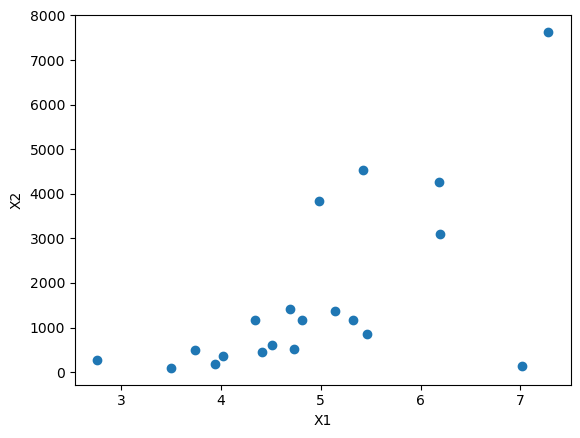

In [6]:
plt.scatter(data['X1'], data['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#C'è correlazione, non super super lineare ma c'è 

il Lambda migliore è= 0.008
ma il lambda usato è 0
p-value of the Shapiro-Wilk test: 0.824
box cox succeeded :)


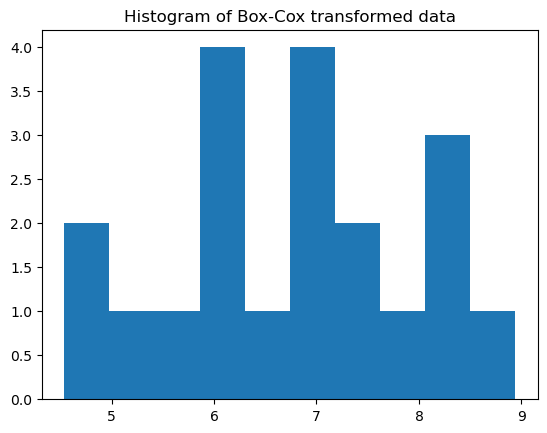

Number of points n = 20
Mean = 6.78


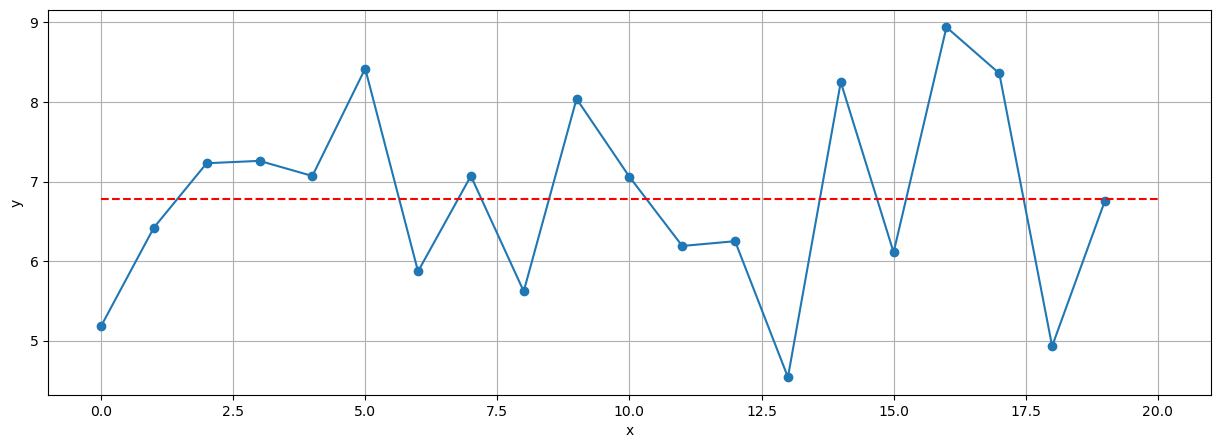

In [7]:
[data['X2_bc'],lmbda]=mf.boxcox(data,'X2')
mf.single_ts_plot(data['X2_bc'])

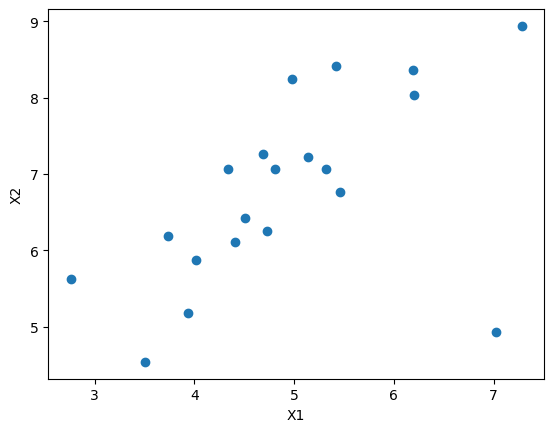

In [8]:
plt.scatter(data['X1'], data['X2_bc'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#ora appare grossa correlazione lineare!

In [9]:
p=2
ARL0=250
alpha_overall=1/250
alpha_single=1-(1-alpha_overall)**(1/p)
k_alpha_single=stats.norm.ppf(1-alpha_single/2)

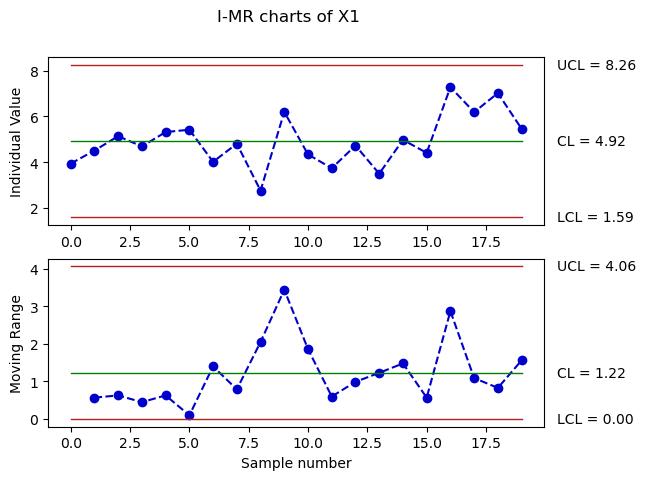

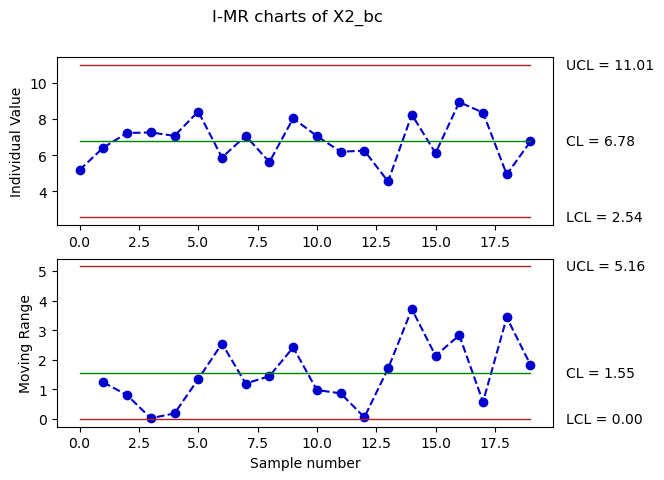

In [10]:
data1IMR=qda.ControlCharts.IMR(data,'X1',K=k_alpha_single)
data2IMR=qda.ControlCharts.IMR(data,'X2_bc',K=k_alpha_single)

Apart from a small sustained shift in the last four observations of the first variable (which may possibly 
deserve some attention), no violation of the control limits is present.

Design a multivariate control chart to monitor the same data, with the same ARL0 used in point a). 
Compare this control chart with the ones designed at point a) and discuss the result. 

In [13]:
data2=data.copy()
data2.drop(columns=['X2'], inplace=True)
print(data2.head())

     X1     X2_bc
0  3.94  5.179984
1  4.51  6.419995
2  5.14  7.229998
3  4.69  7.260002
4  5.32  7.070002


In [14]:
Xbar2 = data2.mean()
print(Xbar2.values)
print(type(Xbar2))

[4.923      6.77849944]
<class 'pandas.core.series.Series'>


In [15]:
m=len(data2)

V = data2.diff().dropna() #matrice (m-1)x(p)

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (m-1) #Short range estimator

# Display the short range estimator
print("The short range estimator is: \n", S2)


The short range estimator is: 
              X1     X2_bc
X1     1.087547  0.823813
X2_bc  0.823813  1.747431


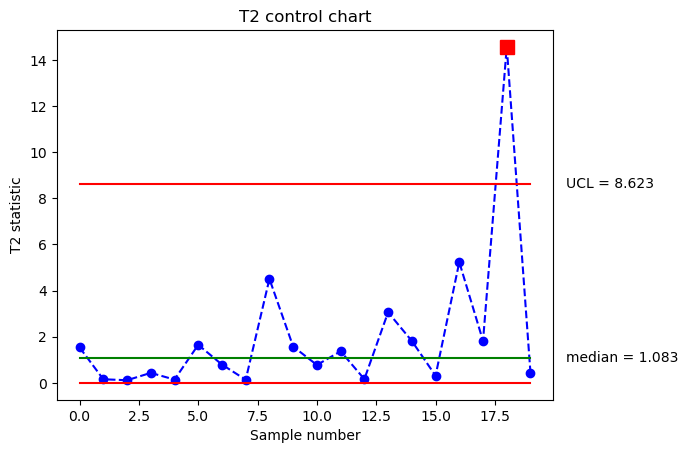

In [16]:
[UCL,data2_CC]=mf.T2cc_n_1(p,m,alpha_overall,data2,Xbar2,S2) #using the short range estimator
#for the variance

In [17]:
S1 = np.zeros((data2.shape[1], data2.shape[1]))

# Calcolare la matrice di covarianza
for i in range(m):
    xi = data2.iloc[i] - Xbar2
    xi = xi.values.reshape(-1, 1)  # Trasformare in vettore colonna
    S1 += xi @ xi.T

S1 = S1 / (m - 1)

print(S1)

[[1.29972737 0.78944229]
 [0.78944229 1.50849042]]


In [18]:
print(p)

2


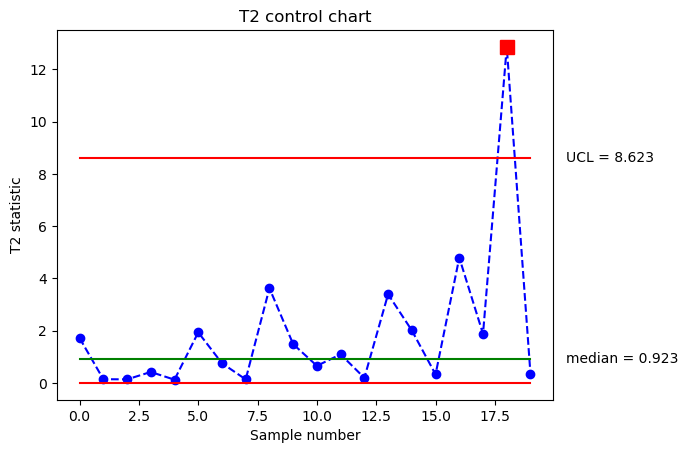

In [19]:
[UCL,data2_CC]=mf.T2cc_n_1(p,m,alpha_overall,data2,Xbar2,S1)
#control chart con S1 (a sto giro cambia il modo in cui si calcola di fatto la T perchè serve la stima della S)
#quello che non cambia è l'UCL che usa sempre e comunque la medesima distribuzione beta

By looking at the scatter plot of the two variables after the logarithm transformation on the second, it is 
possible to see that there is a positive correlation among them. The observation in sample 19 (highlighted in 
red) is quite far away from the bivariate scatter of all other observations. Since the control region of the T2 
control chart corresponds to an ellipse in the bivariate space around the data, the T2 is effective in signalling 
that sample as anomalous with respect to the given dataset. 
No alarm was raised by the univariate control charts because the values of the two variables in sample 19 are 
within the range of the data used to design the control chart. Using two univariate control charts implies a 
rectangular control region in the bivariate space, and sample 19 is inside that region.

c)The project manager wants to evaluate a third approach. He wants to apply the PCA to performance 
index values in Table 2 and monitor the first PC. Is it better to use the sample variance-covariance 
matrix or the correlation matrix to estimate the PCA model? Motivate the answer and apply the PCA 
(report the eigenvalues and eigenvectors, as well as the percentage of variance explained by the first 
PC).  

In [22]:
var_X1=data2['X1'].var()
var_X2_bc=data2['X2_bc'].var()

#varianze molto simili e ordine di grandezza molto simili per le due variabili (X1 e X2_bc)
#quindi si può procedere con la PCA fatta con var-cov matrix

In [23]:
cov_matrix = data2.cov()
print(cov_matrix)


             X1     X2_bc
X1     1.299727  0.789442
X2_bc  0.789442  1.508490


In [25]:
[pca,scores_df]=mf.p_pca(data2, len(data2), standardize='no')
#tecnicamente u1=0.65913542  0.75202427
#e u2=0.75202427 -0.65913542]

Eigenvalues 
 [2.20042204 0.60779574]

Eigenvectors aka Loadings 
 [[ 0.65913542  0.75202427]
 [ 0.75202427 -0.65913542]]

Explained variance ratio 
 [0.78356531 0.21643469]

Cumulative explained variance ratio 
 [0.78356531 1.        ]
first 5 rows of the df scores:
         z1        z2
0 -1.850052  0.314398
1 -0.541827 -0.074283
2  0.482570 -0.134410
3  0.208523 -0.492597
4  0.480894  0.106414


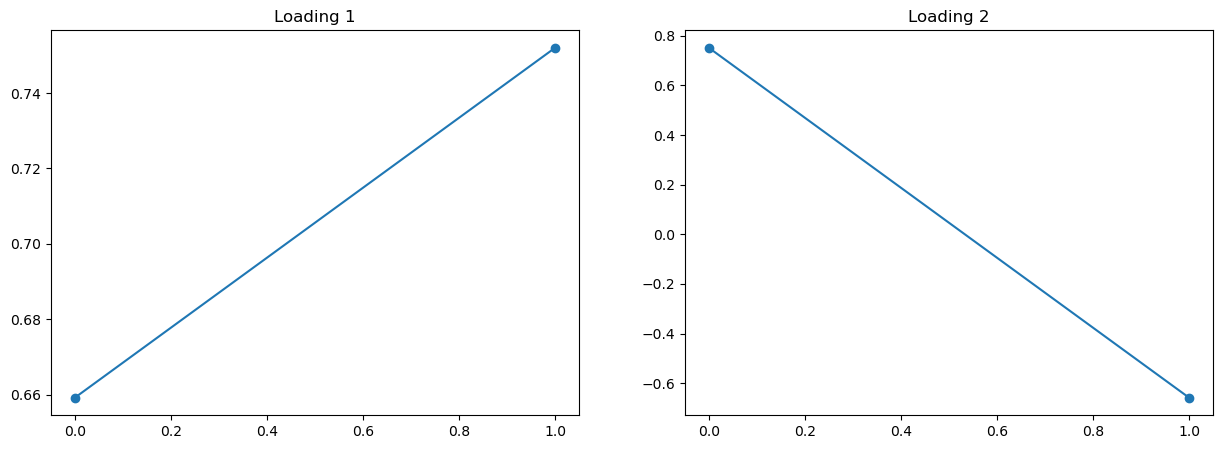

In [27]:
mf.plotloadings(pca)
#a riconferma che i loadings sono quelli sulle righe se adotto pca cosi!!!

In [29]:
scores_df.head()

,z1,z2
0,-1.850052,0.314398
1,-0.541827,-0.074283
2,0.482570,-0.134410
3,0.208523,-0.492597
4,0.480894,0.106414


Based on the result of point c), design a control chart on the first PC and compare the result with the 
ones obtained in point a) and b) (using the same ARL0 adopted in previous points). Discuss the 
result. 

In [ ]:
#teniamo solo z1 come richiesto per fare il CC ma prima check delle assumptions!

In [34]:
mf.runs(scores_df['z1'])

Runs test statistic = 0.459
Runs test p-value = 0.646
Accept H0: the data are random


p-value of the Shapiro-Wilk test: 0.983


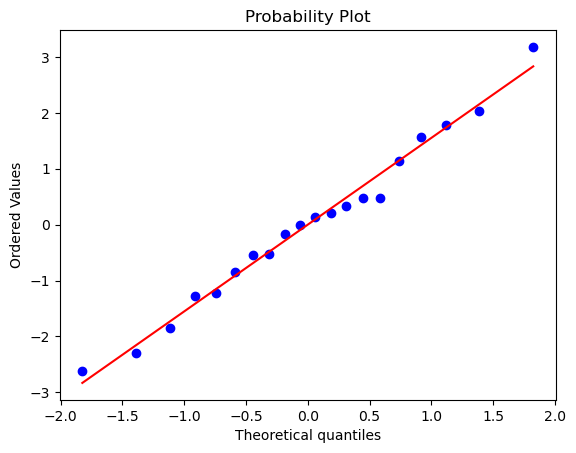

Accept H0: the data are normal


In [35]:
mf.shapiroqq(scores_df['z1'])

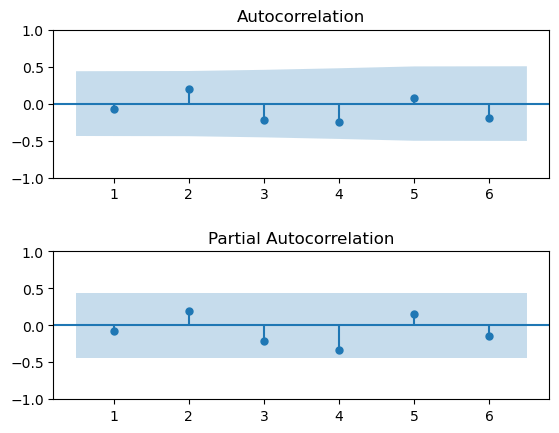

In [36]:
mf.acfpacf(scores_df['z1'])

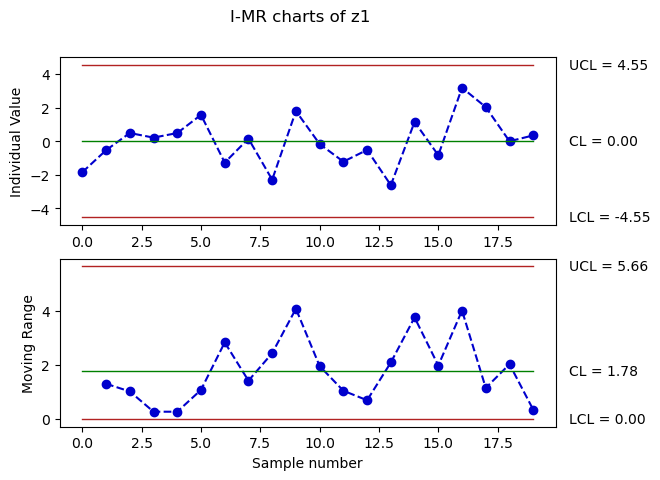

In [33]:

k_overall=stats.norm.ppf(1-alpha_overall/2)
data_IMR_cc_pc1=qda.ControlCharts.IMR(scores_df,'z1',K=k_overall)


No violation of control limits is present. The anomaly signalled by the T2 control chart is not signalled by 
monitoring the first PC. By looking at the scatterplot between PC1 and PC2, it is possible to see that the 
anomaly in sample 19 affects only PC2 (highlighted in red). **PC2 is a contrast between the variables (è praticamente la differenza tra le 2 divisa per 2 diciamo e si vede dall'eigenvectors u2 sulla seconda riga)**, and the 
anomaly actually affects this contrast. As shown above, the positive correlation between the two variables 
implies that high values of X1 correspond to high values of X2 and viceversa. In sample 19, instead, a high 
values of X1 corresponds to a low values of X2. 
When monitoring a process in the PC space, it is a common practice to combine a control chart on first 
retained PCs with a control charts on the PCA model residuals, which is helpful to detect anomalies that do 
not affect the first PCs but only the remaining ones, preventing any information loss. 

PCA Residuals: The residuals in PCA context refer to the differences between the original data points and their reconstructions using a reduced number of principal components. Mathematically, if 

X represents the original data matrix and 

X 
′
  represents the reconstructed data using 
𝑘 principal components (where 
𝑘 is typically less than the original number of variables), then the residuals 
R can be calculated as:

R=X−X' 


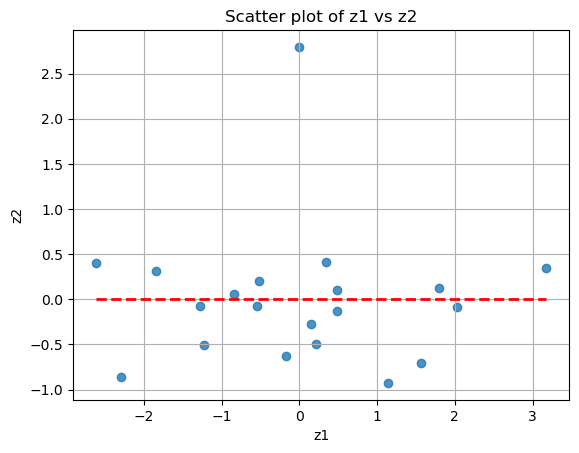

In [38]:
mf.scatter_plot_nice(scores_df,'z1','z2')